#Data Source
https://www.kaggle.com/jeanmidev/smart-meters-in-london

In [ ]:
from google.colab import drive
from datetime import datetime

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Imports
import pandas as pd
import os
import glob
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import statsmodels.api as sm
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from numpy import random as rand

#Import data

# use glob to get all the csv files 
# in the folder
#path = "/content/drive/My Drive/Research/hhblock_dataset/"()
#



In [ ]:
%ls ./drive/MyDrive/Research/hhblock_dataset/

block_0.csv    block_1.csv   block_40.csv  block_61.csv  block_82.csv
block_100.csv  block_20.csv  block_41.csv  block_62.csv  block_83.csv
block_101.csv  block_21.csv  block_42.csv  block_63.csv  block_84.csv
block_102.csv  block_22.csv  block_43.csv  block_64.csv  block_85.csv
block_103.csv  block_23.csv  block_44.csv  block_65.csv  block_86.csv
block_104.csv  block_24.csv  block_45.csv  block_66.csv  block_87.csv
block_105.csv  block_25.csv  block_46.csv  block_67.csv  block_88.csv
block_106.csv  block_26.csv  block_47.csv  block_68.csv  block_89.csv
block_107.csv  block_27.csv  block_48.csv  block_69.csv  block_8.csv
block_108.csv  block_28.csv  block_49.csv  block_6.csv   block_90.csv
block_109.csv  block_29.csv  block_4.csv   block_70.csv  block_91.csv
block_10.csv   block_2.csv   block_50.csv  block_71.csv  block_92.csv
block_110.csv  block_30.csv  block_51.csv  block_72.csv  block_93.csv
block_111.csv  block_31.csv  block_52.csv  block_73.csv  block_94.csv
block_11.csv   block_

In [ ]:
from pprint import pprint

In [ ]:
path = './drive/MyDrive/Research/hhblock_dataset/'
all_meter_days_df = pd.concat(list(pd.read_csv(path + file) for file in os.listdir(path)))

In [ ]:
print("Shape")
pprint(all_meter_days_df.shape)

Shape
(3469352, 50)


#Exploratory Analysis


In [ ]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
summary = all_meter_days_df.describe()
summary

,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,hh_24,hh_25,hh_26,hh_27,hh_28,hh_29,hh_30,hh_31,hh_32,hh_33,hh_34,hh_35,hh_36,hh_37,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
count,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469350.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469331.0000,3469350.0000,3469352.0000,3469352.0000,3469352.0000,3463892.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469351.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000,3469352.0000
mean,0.1793,0.1693,0.1520,0.1381,0.1279,0.1217,0.1171,0.1143,0.1133,0.1158,0.1200,0.1315,0.1467,0.1678,0.1848,0.2006,0.2106,0.2163,0.2160,0.2155,0.2144,0.2135,0.2135,0.2148,0.2158,0.2170,0.2155,0.2132,0.2108,0.2103,0.2124,0.2200,0.2319,0.2509,0.2703,0.2922,0.3061,0.3180,0.3210,0.3208,0.3158,0.3099,0.3001,0.2877,0.2663,0.2422,0.2144,0.1872
std,0.3088,0.3291,0.2980,0.2655,0.2373,0.2197,0.2076,0.1968,0.1903,0.1921,0.1937,0.2079,0.2250,0.2469,0.2633,0.2763,0.2880,0.2945,0.2962,0.2958,0.2973,0.2969,0.2984,0.2983,0.2984,0.2985,0.2961,0.2925,0.2896,0.2872,0.2858,0.2916,0.3015,0.3185,0.3345,0.3525,0.3616,0.3689,0.3681,0.3630,0.3522,0.3424,0.3301,0.3190,0.3028,0.2850,0.2649,0.2419
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0520,0.0480,0.0460,0.0440,0.0420,0.0420,0.0410,0.0410,0.0400,0.0410,0.0410,0.0430,0.0460,0.0500,0.0550,0.0590,0.0610,0.0620,0.0610,0.0600,0.0590,0.0580,0.0580,0.0580,0.0580,0.0590,0.0590,0.0590,0.0590,0.0600,0.0610,0.0630,0.0670,0.0720,0.0780,0.0850,0.0910,0.0970,0.1010,0.1050,0.1080,0.1090,0.1080,0.1030,0.0920,0.0790,0.0670,0.0580
50%,0.0980,0.0880,0.0810,0.0770,0.0740,0.0720,0.0710,0.0700,0.0700,0.0710,0.0720,0.0770,0.0840,0.0950,0.1060,0.1150,0.1210,0.1240,0.1220,0.1210,0.1190,0.1170,0.1160,0.1170,0.1180,0.1200,0.1190,0.1180,0.1180,0.1190,0.1210,0.1270,0.1350,0.1470,0.1600,0.1740,0.1860,0.1950,0.2010,0.2050,0.2070,0.2070,0.2030,0.1950,0.1780,0.1580,0.1340,0.1130
75%,0.1910,0.1680,0.1500,0.1380,0.1300,0.1250,0.1220,0.1200,0.1190,0.1220,0.1270,0.1390,0.1570,0.1830,0.2070,0.2280,0.2400,0.2460,0.2440,0.2420,0.2390,0.2380,0.2370,0.2390,0.2400,0.2420,0.2390,0.2370,0.2340,0.2340,0.2380,0.2480,0.2650,0.2910,0.3190,0.3500,0.3710,0.3880,0.3900,0.3890,0.3820,0.3750,0.3630,0.3490,0.3230,0.2940,0.2580,0.2210
max,7.2720,8.7170,8.0250,8.7500,8.4140,8.5910,7.3570,7.6760,7.5810,7.5680,7.2730,7.6080,8.8920,8.8120,9.1660,8.7820,9.7100,9.6500,9.1060,9.1120,8.8480,8.1360,9.5680,7.7310,9.2940,8.1710,7.5560,8.8750,8.7970,8.6590,8.4250,8.1050,9.9440,10.5280,10.7610,8.6310,8.7020,9.6790,8.8330,9.1410,8.9980,9.1890,8.5390,9.2570,7.8190,8.0510,7.7690,8.4110


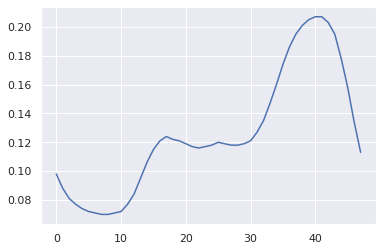

In [ ]:
#Median of all meters
#Baseline of whole data frame
series = [i for i in range(48)]
median_by_hh = summary.iloc[5,:]
plt.plot(series, median_by_hh.values)
plt.show()

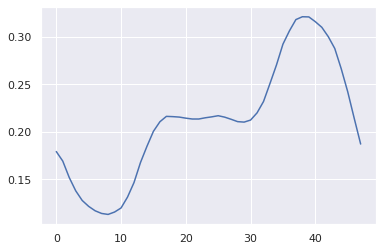

In [ ]:
mean_by_hh = summary.iloc[1,:]
plt.plot(series, mean_by_hh.values)
plt.show()

- compare each meter to the rest of the set
- see if one meter is acting differently than the baseline
- is one building using more energy than the others
- maybe I could look at by day somehow
- sum every row
- (standardized distribution of meter outputs)
- (mean of each meter - mean of whole set) / std dev
- group by meter, month
- subtract mean of each month of the baseline

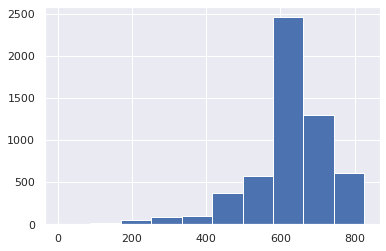

In [ ]:
plt.hist(all_meters_df['LCLid'].value_counts())
plt.show()

In [ ]:
# each meter's average daily usage
mean_daily_usage_by_meter = []

grouped = all_meters_df.groupby('LCLid')
for meter, meter_df in grouped:
  meter_mean = meter_df.sum(axis=1).mean()
  mean_daily_usage_by_meter.append(meter_mean)

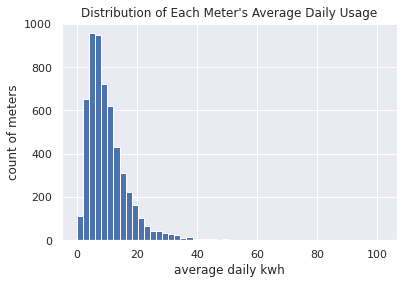

In [ ]:
plt.hist(mean_daily_usage_by_meter, bins=50)
plt.title('Distribution of Each Meter\'s Average Daily Usage')
plt.xlabel('average daily kwh')
plt.ylabel('count of meters')
plt.show()

In [ ]:
np.array(mean_daily_usage_by_meter).max()

101.35673529922585

In [ ]:
# create dict of meters with average daily usage > 20
# each meter's average daily usage

# key is meter id
# value is avg daily usage
avg_daily_usage_by_meter = {}

grouped = all_meters_df.groupby('LCLid')
for meter, meter_df in grouped:
  avg_daily_usage_by_meter[meter] = meter_df.sum(axis=1).mean()

In [ ]:
avg_daily_usage_by_meter_df = pd.DataFrame(avg_daily_usage_by_meter.items(), columns=['meter_id', 'avg_daily_usage'])
avg_daily_usage_by_meter_df

,meter_id,avg_daily_usage
0,MAC000002,12.0956
1,MAC000003,19.0462
2,MAC000004,1.6982
3,MAC000005,4.5803
4,MAC000006,2.8567
...,...,...
5555,MAC005561,7.3247
5556,MAC005562,10.4629
5557,MAC005564,4.0249
5558,MAC005566,17.4242


In [ ]:
count_greater_than_20 = avg_daily_usage_by_meter_df[avg_daily_usage_by_meter_df['avg_daily_usage'] > 20].shape[0]
count_total = avg_daily_usage_by_meter_df.shape[0]
pct_greater_than_20 = count_greater_than_20 / count_total
round(pct_greater_than_20, 4)

0.0777

In [ ]:
avg_daily_usage_by_meter_df.describe()

,avg_daily_usage
count,5560.0000
mean,10.2189
std,7.4965
min,0.0000
25%,5.3878
50%,8.3433
75%,12.8685
max,101.3567


In [ ]:
avg_daily_usage_by_meter_df['avg_daily_usage'].quantile(.20)

4.82823493950604

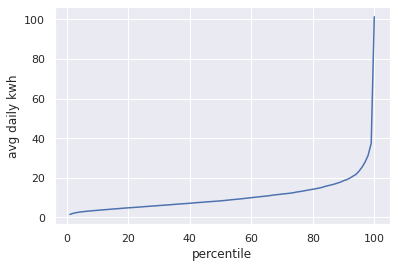

In [ ]:
percentiles = [i + 1 for i in range(100)]
percentile_values = [avg_daily_usage_by_meter_df['avg_daily_usage'].quantile(percentile*0.01) for percentile in percentiles]
plt.plot(percentiles, percentile_values)
plt.xlabel('percentile')
plt.ylabel('avg daily kwh')
plt.show()

In [ ]:
# who is using 101 kwh per day?
avg_daily_usage_by_meter_df.max()

meter_id           MAC005567
avg_daily_usage     101.3567
dtype: object

#Merging Data with informations_households

In [ ]:
#Joining informations_households containing acorn, block, acorn-group, and meter ID
informations_households = pd.read_csv("/content/drive/My Drive/Research/informations_households.csv")

In [ ]:
meters_usage_acorn_block = all_meter_days_df.merge(informations_households, on='LCLid', validate='m:1')
meters_usage_acorn_block.shape

(3469352, 54)

In [ ]:
meters_usage_acorn_block.head()

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,hh_24,hh_25,hh_26,hh_27,hh_28,hh_29,hh_30,hh_31,hh_32,hh_33,hh_34,hh_35,hh_36,hh_37,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47,stdorToU,Acorn,Acorn_grouped,file
0,MAC000002,2012-10-13,0.2630,0.2690,0.2750,0.2560,0.2110,0.1360,0.1610,0.1190,0.1670,0.1090,0.1680,0.1070,0.1660,0.1170,0.1570,0.1260,0.1460,0.1060,0.1350,0.1910,0.9150,0.9330,0.1220,0.1380,0.0760,0.1330,0.0760,0.1330,0.0850,0.2630,0.1340,0.2350,0.1240,0.1840,0.2300,0.1760,0.3880,0.2600,0.9180,0.2780,0.2670,0.2390,0.2300,0.2330,0.2350,0.1880,0.2590,0.2500,Std,ACORN-A,Affluent,block_0
1,MAC000002,2012-10-14,0.2620,0.1660,0.2260,0.0880,0.1260,0.0820,0.1230,0.0830,0.1200,0.0790,0.1210,0.0750,0.1240,0.0730,0.1250,0.0700,0.1300,0.1080,0.1960,0.3460,0.5240,0.0760,0.1290,0.6670,0.2300,0.2200,0.1630,0.0910,0.1700,0.1100,0.1100,0.1210,0.0990,0.1570,0.0930,0.3710,0.3860,1.0850,1.0750,0.9560,0.8210,0.7450,0.7120,0.5110,0.2310,0.2100,0.2780,0.1590,Std,ACORN-A,Affluent,block_0
2,MAC000002,2012-10-15,0.1920,0.0970,0.1410,0.0830,0.1320,0.0700,0.1300,0.0740,0.1240,0.0780,0.1180,0.0820,0.1120,0.0870,0.1060,0.1400,0.1200,1.0750,0.1460,0.1230,0.0820,0.1270,0.0770,0.5510,0.1490,0.1290,0.0750,0.1300,0.0750,0.1290,0.0750,0.1280,0.1660,0.1940,0.6950,0.2600,0.2270,0.2550,1.1640,0.2490,0.2250,0.2580,0.2600,0.3340,0.2990,0.2360,0.2410,0.2370,Std,ACORN-A,Affluent,block_0
3,MAC000002,2012-10-16,0.2370,0.2370,0.1930,0.1180,0.0980,0.1070,0.0940,0.1090,0.0910,0.1050,0.0910,0.1040,0.0920,0.1030,0.0930,0.1010,0.1440,0.1000,0.4080,0.1020,0.1000,0.1160,0.3540,0.1460,0.1900,0.9910,0.3100,0.1210,0.1130,0.0940,0.1190,0.0870,0.1300,0.2380,0.2040,0.2840,0.4470,0.2660,0.9660,0.1720,0.1920,0.2280,0.2030,0.2110,0.1880,0.2130,0.1570,0.2020,Std,ACORN-A,Affluent,block_0
4,MAC000002,2012-10-17,0.1570,0.2110,0.1550,0.1690,0.1010,0.1170,0.0840,0.1180,0.0800,0.1190,0.0750,0.1230,0.0710,0.1260,0.0670,0.1240,0.1180,0.1320,0.3580,0.6280,0.7840,0.6810,0.7490,0.5930,0.5020,0.1150,0.1130,0.0920,0.1240,0.0840,0.1250,0.0780,0.1360,0.2270,0.2070,0.1410,0.2580,0.2170,0.2230,0.0750,0.2300,0.2080,0.2650,0.3770,0.3270,0.2770,0.2880,0.2560,Std,ACORN-A,Affluent,block_0


In [ ]:
meters_usage_acorn_block['day_total_usage'] = meters_usage_acorn_block.iloc[:,2:50].sum(axis=1)

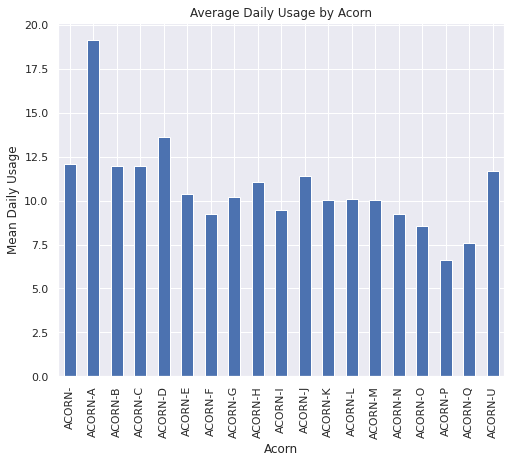

In [ ]:
# if you change to barh remember to change your axis labels
meters_usage_acorn_block.groupby('Acorn')['day_total_usage'].mean().plot.bar(title='Average Daily Usage by Acorn', ylabel='Mean Daily Usage',
         xlabel='Acorn', figsize=(8, 6.5))
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


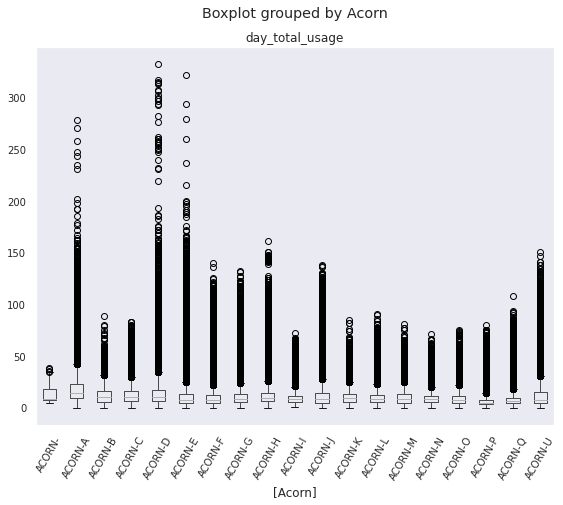

In [ ]:
meters_usage_acorn_block[['day_total_usage', 'Acorn']].boxplot(by='Acorn', grid=False, rot=60, fontsize=10, figsize=(9,7))
plt.show()

Need to make a violin plot

How can the mean be more prominent?

Importance of outliers

Data is skewed right

#Date Stuff

In [ ]:
all_meters_df['day'].dtype

dtype('O')

In [ ]:
all_meters_df['day'].head()

0    2012-10-13
1    2012-10-14
2    2012-10-15
3    2012-10-16
4    2012-10-17
Name: day, dtype: object

In [ ]:
# validate that all dates follow yyyy-mm-dd pattern
all_meters_df['day'].str.contains(r'[0-9]{4}-[0-9]{2}-[0-9]{2}').shape[0] / all_meters_df.shape[0]

1.0

In [ ]:
#Make a column for month
#Extract the two month digits (index 5:7)
def extract_month(date_string):
  return date_string[5:7]

all_meters_df['month'] = all_meters_df['day'].apply(extract_month)

0    10
1    10
2    10
3    10
4    10
Name: month, dtype: object

In [ ]:
# meter usage by month

#Scratch work

In [ ]:
df = pd.DataFrame([['milk',2,3],['milk',4,3],['cookies',3,6]],columns=['item','quantity', 'foo'])

grouped = df.groupby('item')
print(grouped.groups['milk'])
for group, group_df in grouped:
  print(group)
  print(group_df)
  print(group_df[['quantity','foo']].values.mean())

Int64Index([0, 1], dtype='int64')


In [ ]:
df = pd.DataFrame([[2,3],[4,3],[3,6]],columns=['quantity', 'foo'])
df

,quantity,foo
0,2,3
1,4,3
2,3,6


In [ ]:
df.sum(axis=1)

0    5
1    7
2    9
dtype: int64